# Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
%config InlineBackend.figure_format = 'retina'

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [2]:
import pandas as pd
mice = pd.read_csv('Data_Cortex_Nuclear.csv')
mice

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


## Goal is to use protein expression levels to classify mice based on the following classes:

1. c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
2. c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
3. c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
4. c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
5. t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
6. t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
7. t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
8. t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

## First, throw out data points with missing measurements

In [3]:
mice.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [4]:
mice = mice.dropna()

## Can we predict genotype based on protein expression?

In [5]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['Genotype']

X.shape, y.shape

((552, 77), (552,))

In [6]:
pd.DataFrame(y).join(X)

,Genotype,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
75,Control,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.239752,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181
76,Control,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.249031,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096
77,Control,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.247956,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868
78,Control,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.233225,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608
79,Control,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.244469,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Ts65Dn,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,...,0.245705,0.184612,0.133317,0.132591,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423
1046,Ts65Dn,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,...,0.261893,0.188972,0.153772,0.132869,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757
1047,Ts65Dn,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,...,0.232715,0.189189,0.146135,0.129793,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494
1048,Ts65Dn,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,...,0.231471,0.208497,0.155311,0.120850,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585


## The problem with linear regression

### A general linear model

### $y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$

### But $y$ (*Genotype*) will be a continuous variable, whereas it needs to be one of two things: *Control* or *Ts65Dn*.

## We could still try to use linear regression and just impose a threshold to do the classification.

![](images/linear-regression-threshold.jpeg)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

## But what if we have an outlier in the data?

![](images/linear-regression-threshold-outlier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

### Non-ideal data could easily lead to misclassification using a linear model.

## The logistic (sigmoidal) function

# $sigmoid(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1 + e^x}$

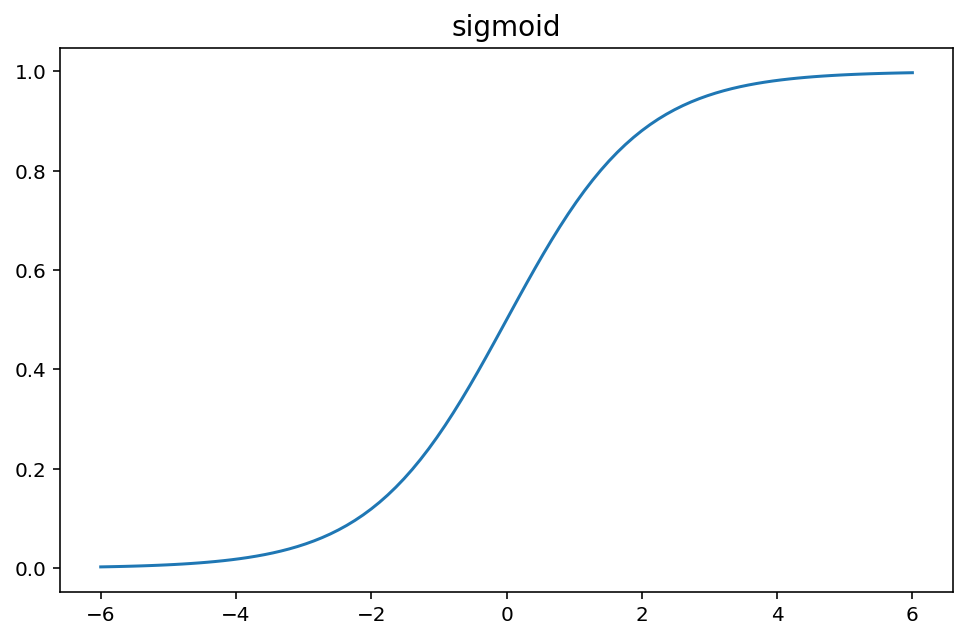

In [7]:
x = np.linspace(-6, 6, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.title('sigmoid');

## A sigmoidal function will better classify categorical data and will be less prone to error due to outliers.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

# Logistic regression

# $p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}$

# $y = \left\{ \begin{matrix}
0 & if & p \le 0.5 & \rightarrow e.g.\; Control \\
1 & if & p > 0.5 & \rightarrow e.g.\; Ts65Dn \\
\end{matrix} \right\}$

## Can we predict genotype based on protein expression using logistic regression?

In [8]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['Genotype']

X.shape, y.shape

((552, 77), (552,))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## How accurate are the model predictions?

In [13]:
y_test_pred = model.predict(X_test)

lr_genotype_accuracy = model.score(X_test, y_test)
lr_genotype_accuracy

0.9049773755656109

In [14]:
genotype_results = pd.DataFrame(y_test)
genotype_results['LR Predicted Genotype'] = y_test_pred
genotype_results

,Genotype,LR Predicted Genotype
754,Ts65Dn,Ts65Dn
532,Control,Control
185,Control,Control
522,Control,Control
1045,Ts65Dn,Ts65Dn
...,...,...
694,Ts65Dn,Ts65Dn
667,Ts65Dn,Ts65Dn
666,Ts65Dn,Ts65Dn
352,Control,Control


## Probabilities for each class

In [15]:
y_test_proba = model.predict_proba(X_test)
y_test_proba.shape

(221, 2)

In [16]:
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [17]:
genotype_results['LR P(Control)'] = y_test_proba[:,0]
genotype_results['LR P(Ts65Dn)'] = y_test_proba[:,1]
genotype_results

,Genotype,LR Predicted Genotype,LR P(Control),LR P(Ts65Dn)
754,Ts65Dn,Ts65Dn,0.326525,0.673475
532,Control,Control,0.904077,0.095923
185,Control,Control,0.915923,0.084077
522,Control,Control,0.809981,0.190019
1045,Ts65Dn,Ts65Dn,0.192639,0.807361
...,...,...,...,...
694,Ts65Dn,Ts65Dn,0.026192,0.973808
667,Ts65Dn,Ts65Dn,0.102601,0.897399
666,Ts65Dn,Ts65Dn,0.099556,0.900444
352,Control,Control,0.878955,0.121045


## Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[ 89,   8],
       [ 13, 111]])

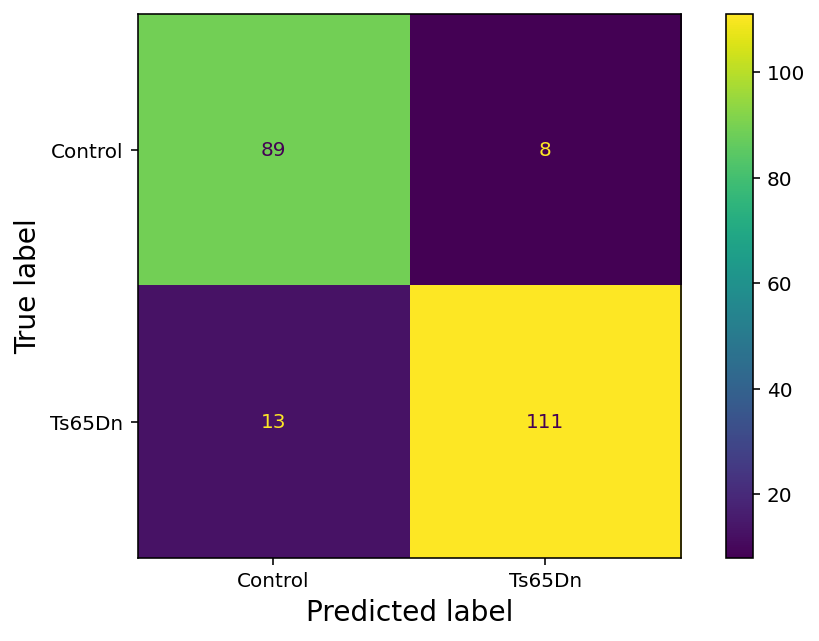

In [20]:
lr_genotype_cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
lr_genotype_cmd.plot();

## $precision = \frac{TP}{TP + FP}$

precision is fraction of correct P predictions

## $recall = \frac{TP}{TP + FN}$

recall is fraction of true P correctly predicted

## $F1 = 2\ \frac{precision\ \times\ recall}{precision\ +\ recall}$

F1 score is the harmonic mean of the precision and recall

$\textrm{worst}\; 0 \le F1 \le 1 \;\textrm{best}$

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

     Control       0.87      0.92      0.89        97
      Ts65Dn       0.93      0.90      0.91       124

    accuracy                           0.90       221
   macro avg       0.90      0.91      0.90       221
weighted avg       0.91      0.90      0.91       221



## Reciever Operating Charachteristic (ROC) curve

In [22]:
from sklearn.metrics import roc_curve, auc

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label=model.classes_[1])

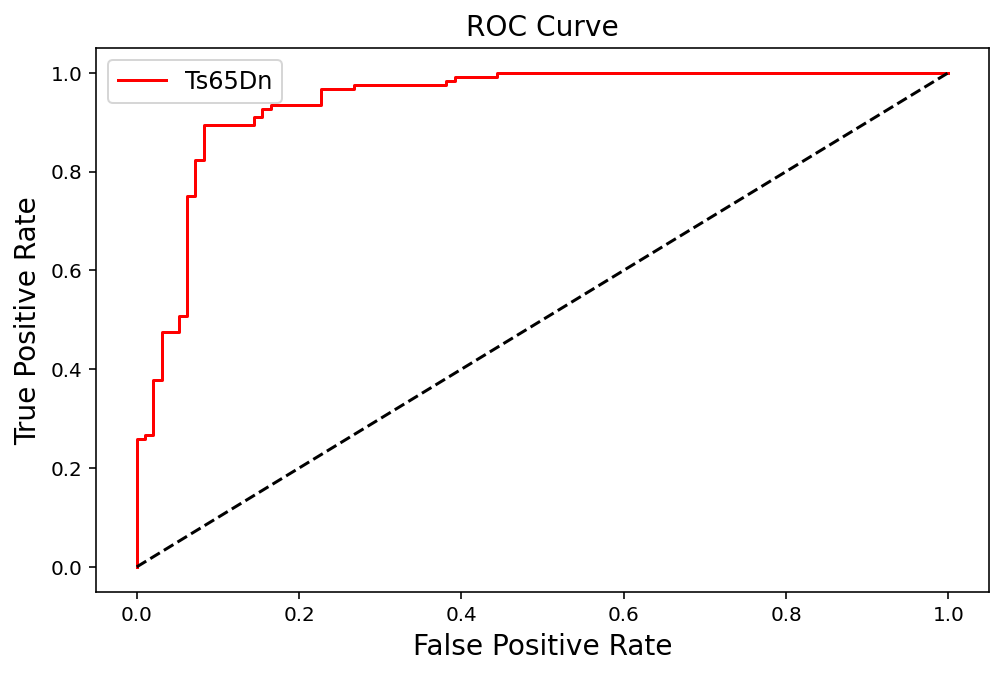

In [24]:
plt.plot(fpr, tpr, color='r', label=model.classes_[1])
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

In [25]:
lr_genotype_auc = auc(fpr, tpr)
lr_genotype_auc

0.941303624875291

In [26]:
# store for later comparison
lr_genotype_fpr = fpr
lr_genotype_tpr = tpr

![](images/roc.png)

Image from Wikipedia

# <font color=darkred>Exercise</font>

Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

Generate a confusion matrix and ROC curve to visualize the performance of your classifier.

If you complete the above, see how well you can also predict wether a mouse was injected with saline or memantine bases solely on protein expression.

In [ ]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['Behavior'] # C/S or S/C

X.shape, y.shape

# Multinomial logistic regression

## Can we predict which class a mouse belongs to based on protein expression?

In [27]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['class']
y.unique()

array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
       't-CS-s', 't-SC-s'], dtype=object)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
X_train.shape, model.coef_.shape

((331, 77), (8, 77))

In [31]:
lr_class_accuracy = model.score(X_test, y_test)
lr_class_accuracy

0.8823529411764706

In [32]:
# predicted class for each mouse
y_test_pred = model.predict(X_test)
y_test_pred.shape

(221,)

In [33]:
# predicted probabilities of all classes for each mouse
y_test_proba = model.predict_proba(X_test)
y_test_proba.shape

(221, 8)

## Prediction probabilities

In [34]:
df = pd.DataFrame(y_test_proba, columns=model.classes_)
df['Prediction'] = y_test_pred
df

,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s,Prediction
0,0.010404,0.002506,0.030842,0.132770,0.002631,0.000685,0.745239,0.074922,t-SC-m
1,0.016786,0.056518,0.009132,0.831731,0.017852,0.002841,0.055364,0.009776,c-SC-s
2,0.002892,0.000353,0.790505,0.018222,0.000351,0.000052,0.162390,0.025235,c-SC-m
3,0.004349,0.018467,0.002256,0.934558,0.013976,0.005844,0.016376,0.004175,c-SC-s
4,0.114970,0.000713,0.041781,0.002569,0.018962,0.001715,0.058718,0.760572,t-SC-s
...,...,...,...,...,...,...,...,...,...
216,0.124079,0.000133,0.004421,0.000024,0.818108,0.009927,0.002717,0.040590,t-CS-m
217,0.155560,0.000107,0.105400,0.000279,0.546348,0.000834,0.125288,0.066185,t-CS-m
218,0.158150,0.000126,0.059079,0.000384,0.647839,0.001171,0.075019,0.058232,t-CS-m
219,0.135037,0.724360,0.000875,0.012176,0.082531,0.030553,0.002859,0.011609,c-CS-s


## Confusion matrix

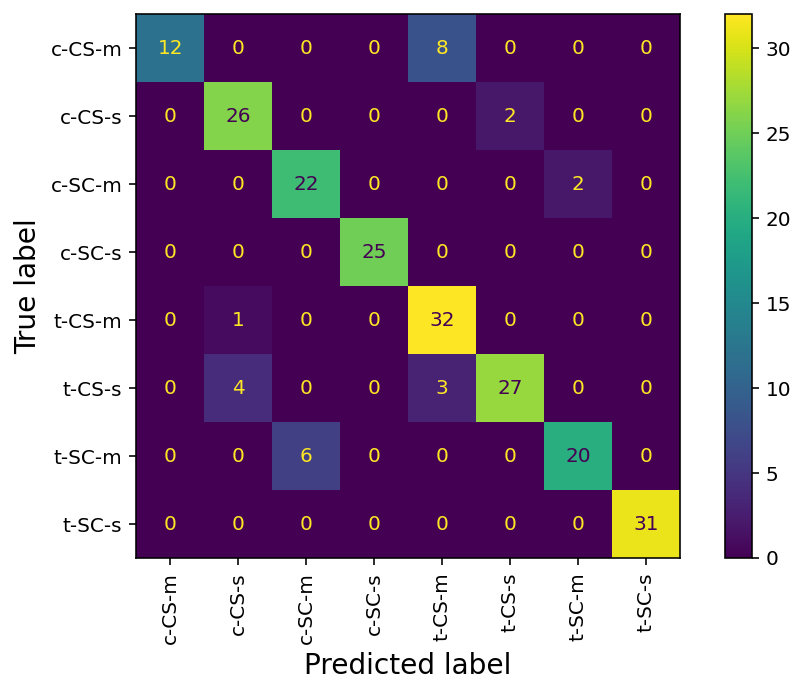

In [35]:
cm = confusion_matrix(y_test, y_test_pred)
lr_class_cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
lr_class_cmd.plot(xticks_rotation='vertical');

## Precision, Recall and F1-score

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      c-CS-m       1.00      0.60      0.75        20
      c-CS-s       0.84      0.93      0.88        28
      c-SC-m       0.79      0.92      0.85        24
      c-SC-s       1.00      1.00      1.00        25
      t-CS-m       0.74      0.97      0.84        33
      t-CS-s       0.93      0.79      0.86        34
      t-SC-m       0.91      0.77      0.83        26
      t-SC-s       1.00      1.00      1.00        31

    accuracy                           0.88       221
   macro avg       0.90      0.87      0.88       221
weighted avg       0.90      0.88      0.88       221



## ROC curves

An ROC curve is for a binary decision.

To show ROC curves for multiple classes, we consider for each class the binary classification of that class vs. all other classes.

In [37]:
from sklearn.preprocessing import label_binarize

classes = y.unique()
yb = label_binarize(y, classes=classes)

yb.shape

(552, 8)

In [38]:
pd.DataFrame(yb, columns=classes)

,c-CS-m,c-SC-m,c-CS-s,c-SC-s,t-CS-m,t-SC-m,t-CS-s,t-SC-s
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
547,0,0,0,0,0,0,0,1
548,0,0,0,0,0,0,0,1
549,0,0,0,0,0,0,0,1
550,0,0,0,0,0,0,0,1


In [40]:
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, yb_train, yb_test = train_test_split(X, yb, test_size=0.4, random_state=1)

classifier = OneVsRestClassifier(LogisticRegression())

classifier.fit(X_train, yb_train)

yb_test_proba = classifier.predict_proba(X_test)

yb_test_proba.shape

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(221, 8)

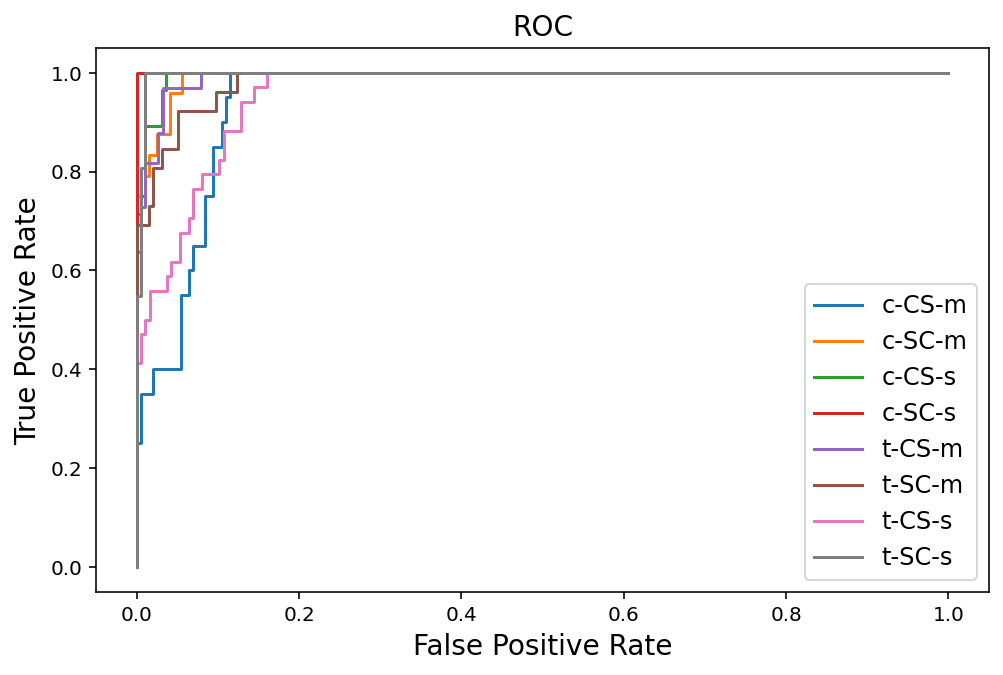

In [41]:
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(yb_test[:,i], yb_test_proba[:,i])
    plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

# Decision trees

![](images/decision-tree.png)

# Random Forest

Create a forest of many decision trees, where for each tree we...

    1. Select a random subset of features from the whole set of features
    2. Select a random subset of data points (rows) from the whole dataset (e.g. a bootstrapped dataset)
    3. Train the tree on the selected features and data points

We then take the mode of the predictions across all trees as the model prediction.

## Can we predict Genotype based on protein expression using a Random Forest classifier?

In [42]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['Genotype']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_test_pred = model.predict(X_test)

In [47]:
genotype_results['RF Predicted Genotype'] = y_test_pred
genotype_results

,Genotype,LR Predicted Genotype,LR P(Control),LR P(Ts65Dn),RF Predicted Genotype
754,Ts65Dn,Ts65Dn,0.326525,0.673475,Ts65Dn
532,Control,Control,0.904077,0.095923,Control
185,Control,Control,0.915923,0.084077,Control
522,Control,Control,0.809981,0.190019,Control
1045,Ts65Dn,Ts65Dn,0.192639,0.807361,Ts65Dn
...,...,...,...,...,...
694,Ts65Dn,Ts65Dn,0.026192,0.973808,Ts65Dn
667,Ts65Dn,Ts65Dn,0.102601,0.897399,Ts65Dn
666,Ts65Dn,Ts65Dn,0.099556,0.900444,Ts65Dn
352,Control,Control,0.878955,0.121045,Control


In [48]:
from sklearn.metrics import accuracy_score

rf_genotype_accuracy = accuracy_score(y_test, y_test_pred)

rf_genotype_accuracy, lr_genotype_accuracy

(0.9638009049773756, 0.9049773755656109)

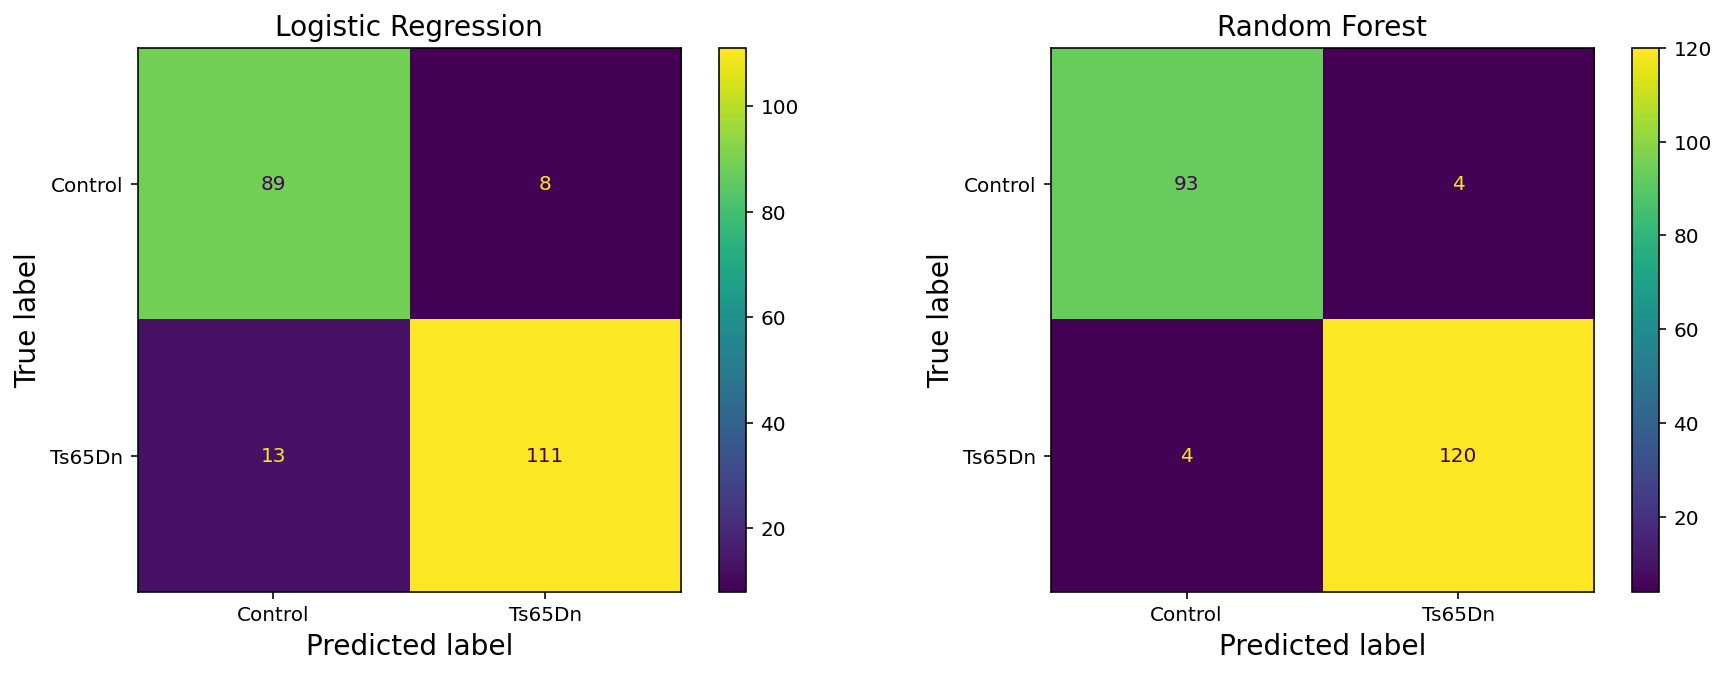

In [49]:
cm = confusion_matrix(y_test, y_test_pred)
rf_genotype_cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
lr_genotype_cmd.plot(ax=ax)
plt.title('Logistic Regression')
ax = plt.subplot(1,2,2)
rf_genotype_cmd.plot(ax=ax)
plt.title('Random Forest');

In [52]:
y_test_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1], pos_label=model.classes_[1])

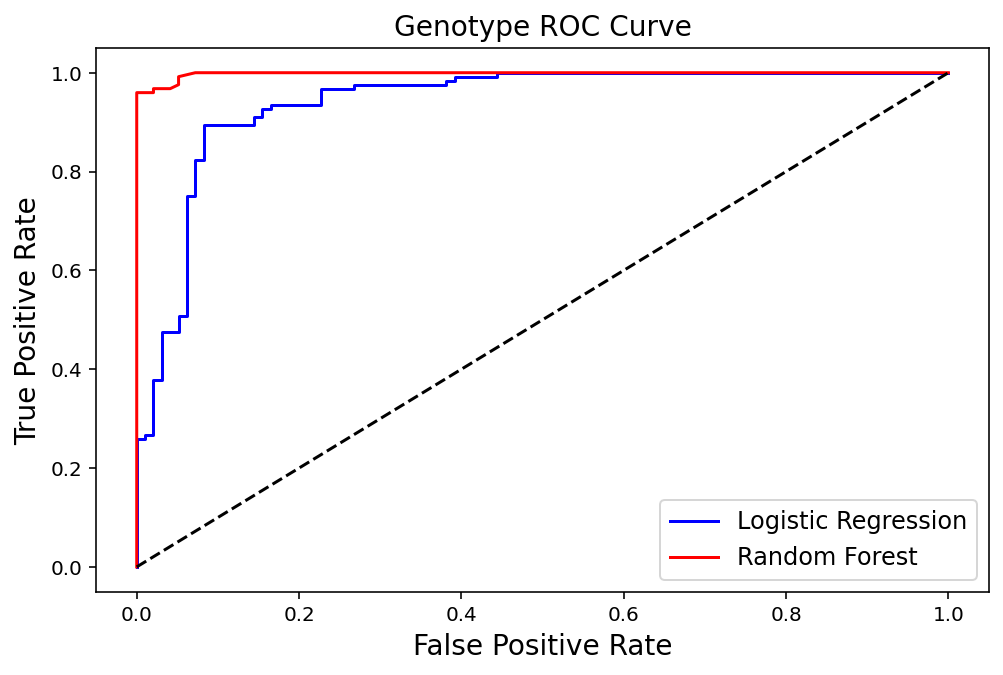

In [53]:
plt.plot(lr_genotype_fpr, lr_genotype_tpr, color='b', label='Logistic Regression')
plt.plot(fpr, tpr, color='r', label='Random Forest')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Genotype ROC Curve')
plt.legend();

# <font color=darkred>Exercise</font>

Use a random forest classifier to predict a mouse's class based on protein expression.

Generate a confusion matrix to visualize the classifier's performance.

Which classifier did a better job, logistic regression or random forest?

In [ ]:
X = mice.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
y = mice['class'] # 8 different classes

X.shape, y.shape